In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import gzip
from sklearn.tree import DecisionTreeClassifier
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import initializers
from keras import optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import math

In [3]:
def accuracy(pred, test):
  length = len(pred)
  num = 0
  for i in range(length):
    if pred[i]==test[i]:
      num += 1
  return num/(length*1.0)

#Question 2

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_test.csv")

In [ ]:
X_train = df_train.loc[ : , df_train.columns != 'label']
y_train = pd.DataFrame(df_train['label'])

X_test = df_test.loc[ : , df_test.columns != 'label']
y_test = pd.DataFrame(df_test['label'])

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# X_train = X_train.reshape((60000,28,28))
# X_train = X_train.reshape((-1,784))
# y_train = y_train.reshape((60000,))

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=784, trainable=True,activation='relu', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(10, trainable=True, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

In [ ]:
history = model.fit(X_train, to_categorical(y_train), batch_size=512, epochs=30)

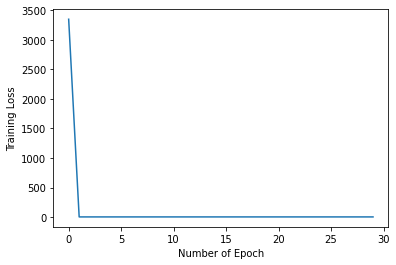

In [ ]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred = list(y_pred)
y_test = y_test.reshape(10000,)
y_test = list(y_test)

In [ ]:
print(accuracy(y_pred, y_test))

0.1001


In [6]:
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

#Question 4

In [7]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [9]:
dataset1 = np.zeros((60000,28*28))
y1 = []

dataset2 = np.zeros((60000,28*28))
y2 = []

dataset3 = np.zeros((60000,28*28))
y3 = []

notVal1 = []
notVal2 = []
notVal3 = []

In [10]:
for i in range(60000):

  index1 = random.randint(0,59999)
  if index1 not in notVal1:
    notVal1.append(index1)

  index2 = random.randint(0,59999)
  if index2 not in notVal2:
    notVal2.append(index2)

  index3 = random.randint(0,59999)
  if index3 not in notVal3:
    notVal3.append(index3)

  dataset1[i] = X_train[index1]
  y1.append(y_train[index1])

  dataset2[i] = X_train[index2]
  y2.append(y_train[index2])

  dataset3[i] = X_train[index3]
  y3.append(y_train[index3])

val1 = np.zeros((60000-len(notVal1),28*28))
y_val1 = []

val2 = np.zeros((60000-len(notVal2),28*28))
y_val2 = []

val3 = np.zeros((60000-len(notVal3),28*28))
y_val3 = []

j1 = 0
j2 = 0
j3 = 0

for i in range(60000):

  if i not in notVal1 and j1<60000-len(notVal1):
    val1[j1] = X_train[i]
    y_val1.append(y_train[i])
    j1 += 1

  if i not in notVal2 and j2<60000-len(notVal2):
    val2[j2] = X_train[i]
    y_val2.append(y_train[i])
    j2 += 1

  if i not in notVal3 and j3<60000-len(notVal3):
    val3[j3] = X_train[i]
    y_val3.append(y_train[i])
    j3 += 1

In [11]:
print(val1.shape)
print(val2.shape)
print(val3.shape)
print(len(notVal1))
print(len(notVal2))
print(len(notVal3))

(22099, 784)
(22131, 784)
(21980, 784)
37901
37869
38020


3 Decision Trees have to be made.

In [12]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(dataset1,y1)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(dataset2,y2)

clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(dataset3,y3)

In [13]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [16]:
num = 0

for i in range(len(y_test)):

  a = y_pred1[i]
  b = y_pred2[i]
  c = y_pred3[i]

  ans = y_test[i]

  if a==b and b==c:
    if a==ans:
      num += 1
  elif a==b and b!=c:
    if a==ans:
      num += 1
  elif b==c and c!=a:
    if b==ans:
      num += 1
  elif c==a and a!=b:
    if c==ans:
      num += 1
  else:
    if a==ans:
      num += 1

num = num*1.0

print('Accuracy= ', num/len(y_test))

Accuracy=  0.9018
